In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np



In [56]:
df=pd.read_csv("C:/Users/Svea/.vscode/AI_projects/co2emissions/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [57]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [58]:
x=cdf.drop(columns='CO2EMISSIONS')
x

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
1062,3.0,6,11.8
1063,3.2,6,11.5
1064,3.0,6,11.8
1065,3.2,6,11.3


In [59]:
y=df['CO2EMISSIONS']
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
regr=LinearRegression()

In [64]:
regr.fit(x_train,y_train)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [11.98993058  7.54469599  8.98695981]
Intercept:  69.0522099255378


Plotting fit line with our training data is tough as different parameters of our training data have very distant values

Checking model on training data

In [65]:
y_pred_train=regr.predict(x_train)
# y_pred_train

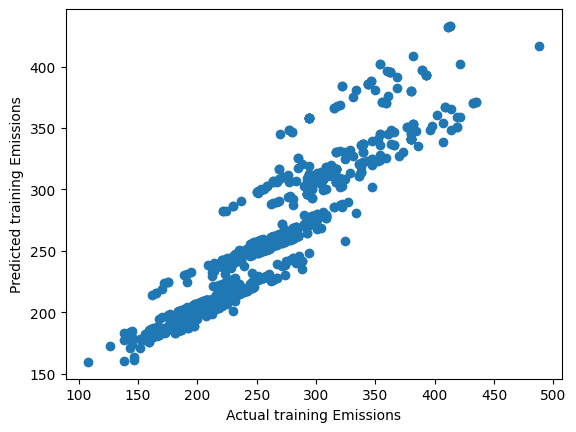

In [66]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual training Emissions')
plt.ylabel('Predicted training Emissions')
plt.show()

Checking model on testing data

In [67]:
y_pred_test=regr.predict(x_test)

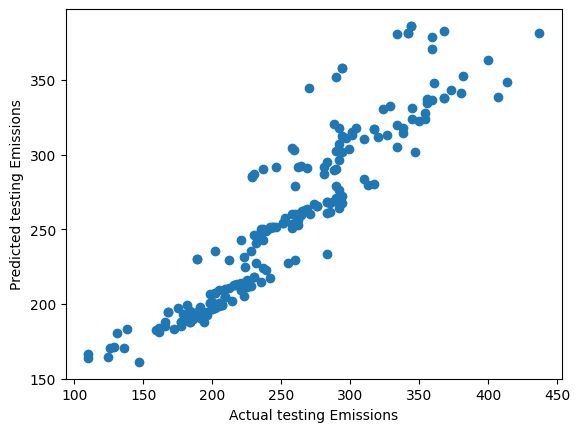

In [68]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual testing Emissions')
plt.ylabel('Predicted testing Emissions')
plt.show()


Evaluating the model

In [69]:
from sklearn.metrics import r2_score

In [70]:
print("R2 score: %.2f" % r2_score(y_test, y_pred_test))
# (r2_score closer to 1 indicates a good model)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred_test - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_test - y_test) ** 2))

R2 score: 0.86
Mean absolute error: 18.02
Residual sum of squares (MSE): 589.24
